In [1]:
# Test colorizing intensity images 

In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
from micron2.codexutils import get_images, blend_images

import scanpy as sc
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
!ls

dataset.h5ad			     test_clutering__tsne_leiden.ipynb
dataset.hdf5			     test_codexutils__colorize.ipynb
f.h5ad				     test_data__pull_nuclei.ipynb
image_sources.txt		     test_imports.ipynb
test_clustering__encode_slide.ipynb  trained_simclr
test_clustering__simCLR.ipynb


In [81]:
ad = sc.read_h5ad('dataset.h5ad')
ad

AnnData object with n_obs × n_vars = 146791 × 40
    obs: 'mean_leiden', 'z_leiden'
    uns: 'image_sources', 'mean_leiden_colors', 'source_data', 'z_leiden_colors'
    obsm: 'coordinates'

In [109]:
use_channels = ['DAPI', 'CD45', 'CD3e']
use_files = [ad.uns['image_sources'][c] for c in use_channels]
print(use_files)

['/mnt/linux-data/codex/preprocessed_data/201021_BreastFFPE_Final/images/201021_BreastFFPE_Final_13_DAPI-044_13.tif', '/mnt/linux-data/codex/preprocessed_data/201021_BreastFFPE_Final/images/201021_BreastFFPE_Final_11_CD45_11.tif', '/mnt/linux-data/codex/preprocessed_data/201021_BreastFFPE_Final/images/201021_BreastFFPE_Final_23_CD3e_23.tif']


(250, 250, 3)
saturating image at value 17
saturating image at value 3
saturating image at value 1


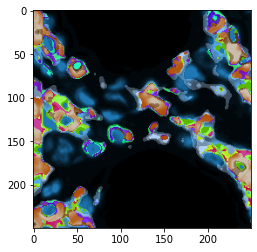

In [115]:
bbox = [1700, 1950, 2000, 2250]
images = get_images(use_files, bbox)
print(images.shape)

blended = blend_images(images)
view = blended.view(dtype=np.uint8).reshape((h,w,4))

plt.imshow(view)